In [610]:
import pandas as pd
from pandas import DataFrame
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import events
import visualise

# FILE = 'dataset/bob_all_processed_mins/2020_76.csv'
FILE = 'dataset/transformed_minutes/interval_15m/2022_152-h.csv'
# FILE = 'dataset/_bob_useful_processed_mins/2020_76-qhs_20190601-20190701.csv'

df = pd.read_csv(FILE, dtype={
        't_i_1': float,
        't_i_2': float,
        't_i_3': float,
        't_i_4': float,
        't_o': float,
        'weight_kg': float,
        "weight_delta": float,
        'numeric.time': float,
        'h': float,
        't': float,
        'p': float,
    }, low_memory=False, parse_dates=['time'], index_col='time', date_format='%Y-%m-%d %H:%M:%S')
df = df.infer_objects(copy=False)

events_indexes = events.get_events_indexes(df)

swarming_indexes = events_indexes[0]
queencell_indexes = events_indexes[1]
feeding_indexes = events_indexes[2]
honey_indexes = events_indexes[3]
treatment_indexes = events_indexes[4]
died_indexes = events_indexes[5]
    
print (f'Swarming {len(swarming_indexes)}: {swarming_indexes}')
print (f'Queencell {len(queencell_indexes)}: {queencell_indexes}')
print (f'Feeding {len(feeding_indexes)}: {feeding_indexes}')
print (f'Honey {len(honey_indexes)}: {honey_indexes}')
print (f'Treatment {len(treatment_indexes)}: {treatment_indexes}')
print (f'Died {len(died_indexes)}: {died_indexes}')
print ('========================================')
print(f"{df.index.min()}  ---  {df.index.max()}") 

Swarming 0: []
Queencell 0: []
Feeding 0: []
Honey 1: [Timestamp('2022-01-30 00:00:00')]
Treatment 0: []
Died 0: []
2022-01-27 00:00:00  ---  2022-12-31 23:45:00


# Visualize

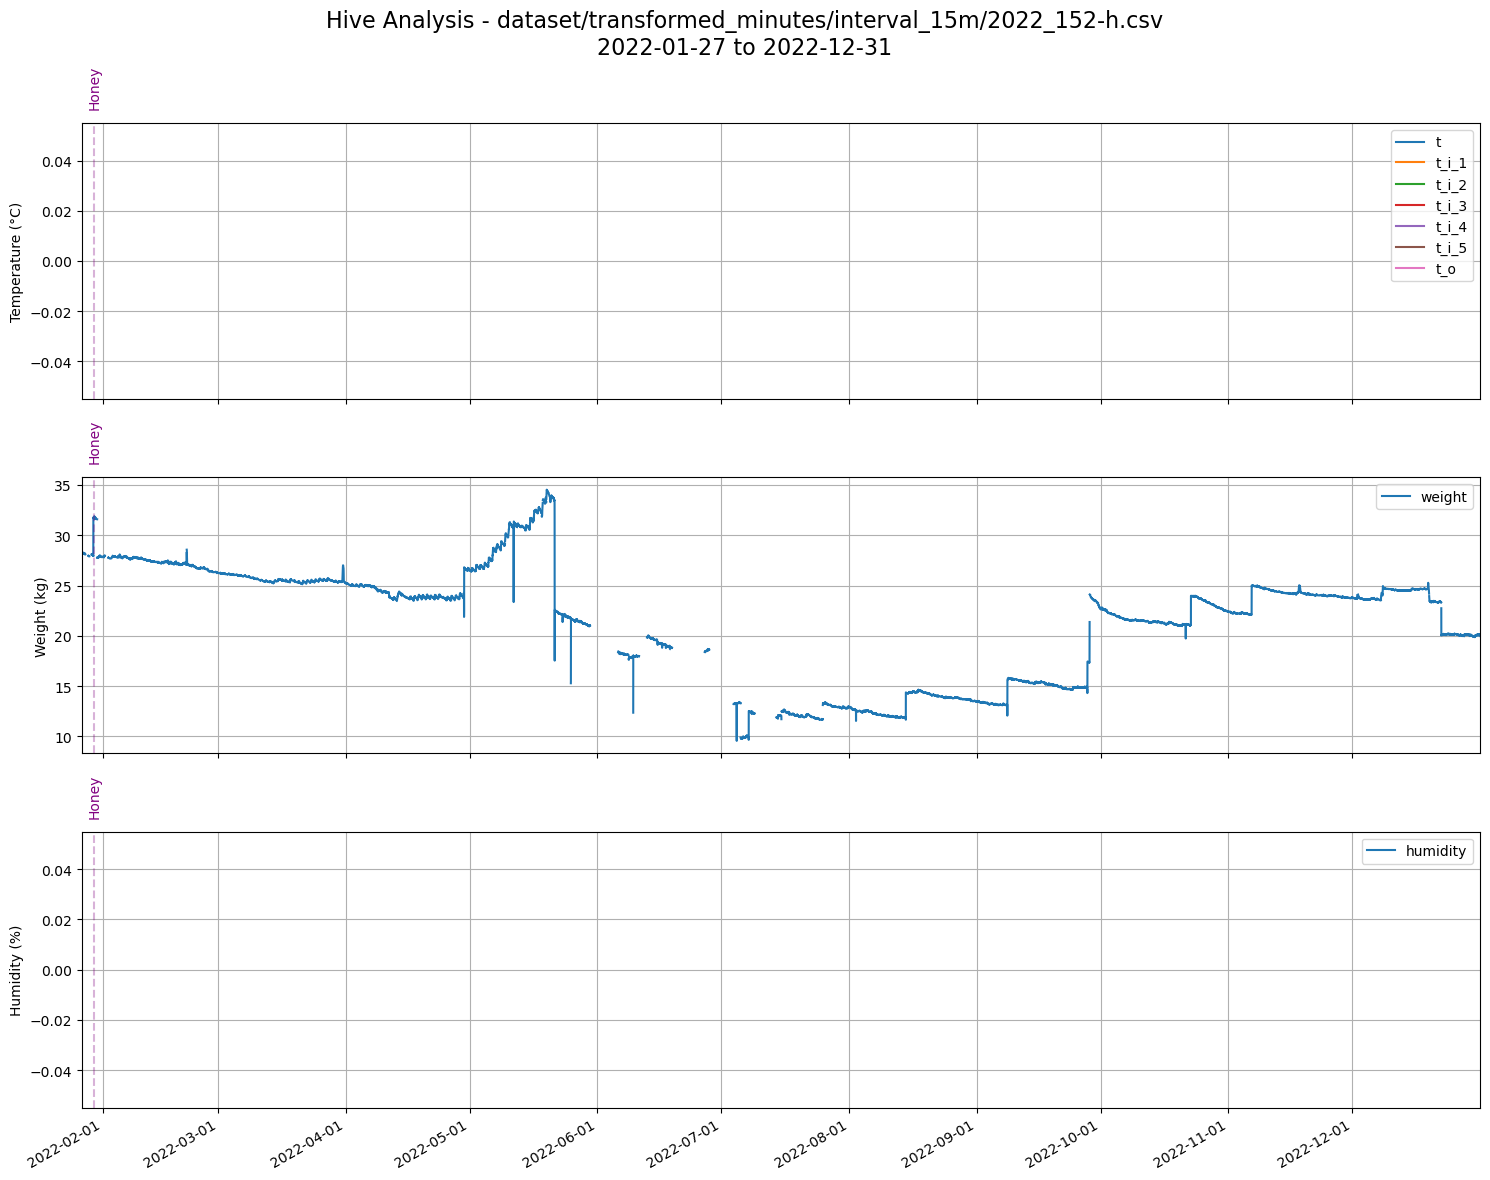

In [611]:
start_date =  df.index.min()
end_date = df.index.max()
# start_date = pd.to_datetime('2022-11-08')
# end_date = pd.to_datetime('2022-12-05')

visualise.visualise(df, start_date, end_date, FILE, {
    'Swarming': swarming_indexes,
    'Queencell': queencell_indexes,
    'Feeding': feeding_indexes,
    'Honey': honey_indexes,
    'Treatment': treatment_indexes,
    'Died': died_indexes
})


# Slice useful 

In [608]:
# start_date = pd.to_datetime('2020-06-01')
# end_date = pd.to_datetime('2020-07-01')

df_slice = df.loc[start_date:end_date]
df_slice

,X.1,X,key,t_i_1,t_i_2,t_i_3,t_i_4,t_i_5,t_o,weight_kg,...,treatment.next.dif,died.next.dif,swarming.next.dif,swarming,queencell,feeding,honey,treatment,died,time.1
time,,,,,,,,,,,,,,,,,,,,,
2022-11-08 00:00:00,11438.0,447841.0,151.0,25.773000,33.295333,34.670000,33.962000,25.901000,5.586667,37.504933,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,2022-11-08 00:00:00
2022-11-08 00:15:00,11453.0,447856.0,151.0,26.653333,32.884000,34.606667,33.963333,25.711333,5.472000,37.504800,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,2022-11-08 00:15:00
2022-11-08 00:30:00,11468.0,447871.0,151.0,27.167333,33.006667,34.485667,34.028000,25.862333,5.524000,37.505567,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,2022-11-08 00:30:00
2022-11-08 00:45:00,11483.0,447886.0,151.0,26.923000,33.333667,34.535667,34.293333,25.936667,5.427667,37.504833,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,2022-11-08 00:45:00
2022-11-08 01:00:00,11498.0,447901.0,151.0,26.863333,32.880667,34.405333,34.198000,25.792000,5.224000,37.503700,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,2022-11-08 01:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-04 23:00:00,49927.0,486661.0,151.0,2.150333,1.620000,1.888000,2.560000,3.380000,1.258000,35.837033,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,2022-12-04 23:00:00
2022-12-04 23:15:00,49942.0,486676.0,151.0,2.120000,1.610000,1.880000,2.560000,3.380000,1.310000,35.835900,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,2022-12-04 23:15:00
2022-12-04 23:30:00,49957.0,486691.0,151.0,2.120000,1.594000,1.880000,2.536000,3.380000,1.338000,35.835200,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,2022-12-04 23:30:00


In [609]:
fs = FILE.split('/')
file = fs[-1].replace('2020_', '').replace('2019_', '').replace('2021_', '').replace('2022_', '').replace('.csv', '')
output_filename = f"{file}_{start_date.strftime('%Y%m%d')}-{end_date.strftime('%m%d')}"
df_slice.to_csv(f'dataset/_bob_useful_processed_mins/{output_filename}.csv')